In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
np.random.seed(8) 

sns.set()

## Ogólne informacje

In [2]:
df = pd.read_csv('datasets/penguins_size.csv')
# Usuwamy wiersze zawierające wartości NaN
df = df.dropna()
# Usuwamy wiersz z płcią "."
df = df.drop(labels=[df[df["sex"] == "."].index[0]], axis=0)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# Sprawdzamy rozkład płci, gatunków oraz ich miejsc występowania

for row in df:
    if df[row].dtype != np.float64:
        print(f"Kolumna {df[row].name}:")
        print(df[row].value_counts())
        print("---------------------------")

Kolumna species:
Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64
---------------------------
Kolumna island:
Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64
---------------------------
Kolumna sex:
MALE      168
FEMALE    165
Name: sex, dtype: int64
---------------------------


## Wizualizacja

<AxesSubplot:xlabel='island', ylabel='count'>

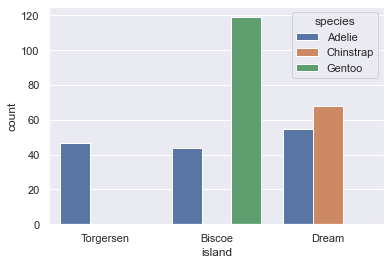

In [4]:
sns.countplot(data=df, x="island", hue='species')

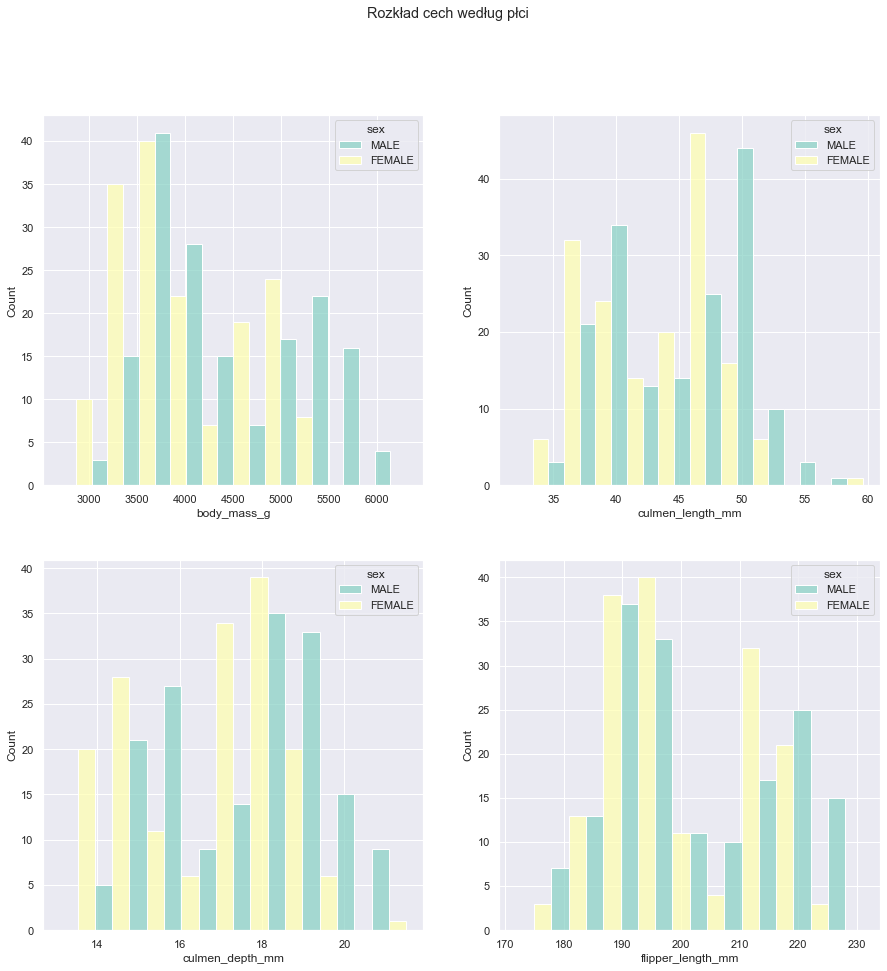

In [5]:
columns = ["body_mass_g", 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Rozkład cech według płci')

sns.set_palette("Set3", 2, 1)

sns.histplot(data=df, ax=axes[0,0], x=columns[0], hue="sex", multiple='dodge')
sns.histplot(data=df, ax=axes[0,1], x=columns[1], hue="sex", multiple='dodge')
sns.histplot(data=df, ax=axes[1,0], x=columns[2], hue="sex", multiple='dodge')
sns.histplot(data=df, ax=axes[1,1], x=columns[3], hue="sex", multiple='dodge')

sns.set_palette("deep")

Text(0.5, 0.98, 'Korelacja pomiędzy dwiema cechami')

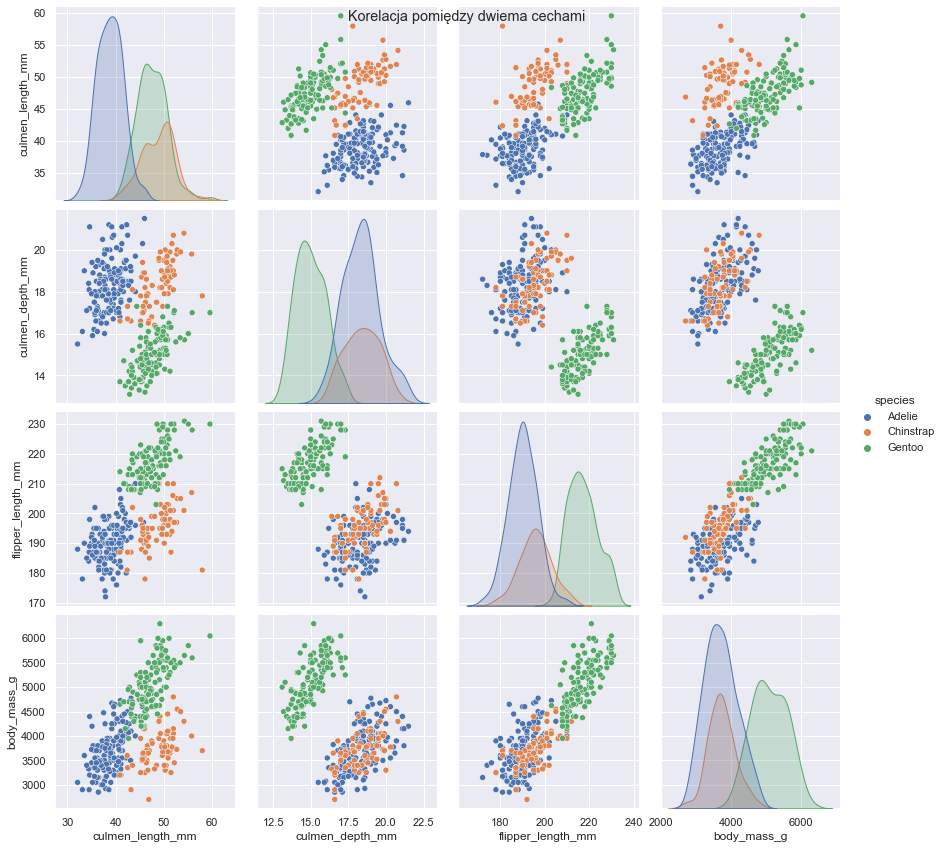

In [6]:
sns.pairplot(df, hue="species", height=3).fig.suptitle('Korelacja pomiędzy dwiema cechami')

[Text(0.5, 1.0, 'Macierz korelacji')]

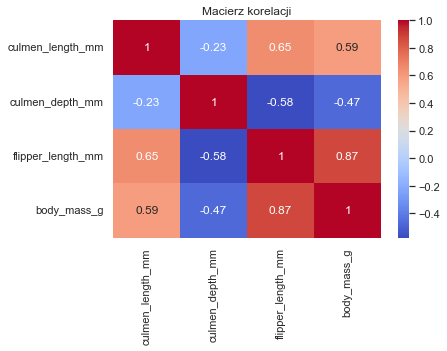

In [7]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True).set(title="Macierz korelacji")

### Spostrzeżenie:
Zauważamy mocną korelację między *body_mass_g* oraz *flipper_length_mm*, więc na wykresie 3D opuszczamy cechę *body_mass_g*

In [ ]:
fig = px.scatter_3d(
    df, 
    x='culmen_length_mm', 
    y='culmen_depth_mm', 
    z='flipper_length_mm', 
    color_discrete_sequence=px.colors.qualitative.D3, 
    color='species'
)

fig.update_layout(height=800)
fig.update_traces(
    marker={
        "line":{"width":1}
    }
)
fig.show()

## Przekształcenie i podział zbioru, przygotowanie do treningu

In [ ]:
df.columns # takie mamy kolumny

In [ ]:
df = pd.get_dummies(df, columns=["island", "sex"])
df

In [ ]:
df.columns # takie mamy kolumny

In [ ]:
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_FEMALE', 'sex_MALE']]

Y = df['species']

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

print("X_train  ", X_train.shape)
print("y_train  ", y_train.shape)
print("X_test  ", X_test.shape)
print("y_test  ", y_test.shape)

In [ ]:
train_df = X_train.copy()
test_df = X_test.copy()
train_df['y'] = y_train
test_df['y'] = "?"

fig = px.scatter_3d(pd.concat([train_df, test_df]), x='culmen_length_mm', 
    y='culmen_depth_mm', 
    z='flipper_length_mm', 
    color_discrete_sequence=px.colors.qualitative.D3,
                   color="y")
fig.update_layout(height=800)
fig.update_traces(marker={"line":{"width":2}})

## k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# inicjalizujemy nasz klasyfikator
neigh = KNeighborsClassifier(n_neighbors=3)

# dopasowujemy dataset, czyli "trening"
neigh.fit(X_train, y_train)

In [ ]:
X_test.head()

In [ ]:
neigh.predict_proba(X_test.head())

In [ ]:
prediction = neigh.predict(X_test.head())
ground_truth = y_test.head().values

print("prediction: ", prediction)
print("ground truth: ", ground_truth)

In [ ]:
neigh.score(X_test, y_test)

In [ ]:
import statistics

y = []
x = []
for k in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train.values, y_train)
    acc = neigh.score(X_test.values, y_test)
    y.append(acc)
    x.append(k)
print(f"Średnia skuteczność: {statistics.mean(y)}")
sns.lineplot(y=y, x=x)